<a href="https://colab.research.google.com/github/sundarjhu/Astrostatistics2025/blob/main/Lesson01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

In [2]:
T = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
PT = np.array([0, 1, 0, 3, 0, 3, 0, 1, 0]) * 1/8
CDF = np.cumsum(PT)

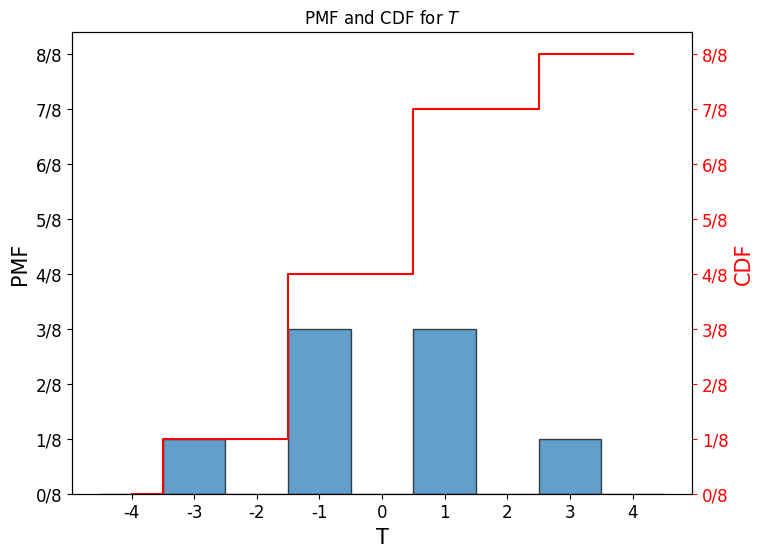

In [4]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# PMF on left y-axis
ax1.bar(T, PT, width=1.0, align='center', edgecolor='black', alpha=0.7)
ax1.set_xlabel("T", fontsize=15)
ax1.set_ylabel("PMF", fontsize=15)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_yticks(np.arange(0, 9/8, 1/8))
ax1.set_yticklabels([f"{i}/8" for i in range(9)])
ax1.set_xticks(np.arange(-4, 5, 1))
ax1.set_xticklabels([str(i) for i in range(-4, 5)])
ax1.set_ylim(0, 1.05)

# CDF on right y-axis
ax2 = ax1.twinx()
ax2.step(T, CDF, where='mid', color='red')
ax2.set_ylabel("CDF", fontsize=15, color="red")
ax2.tick_params(axis='y', labelsize=12, colors="red")
# ax2.set_ylim(0, 1.05)
left_ylim = ax1.get_ylim()
ax2.set_ylim(0, left_ylim[1])
ax2.set_yticks(np.linspace(0, 1, 9))
ax2.set_yticklabels([f"{i}/8" for i in range(9)], color="red")

# Title
plt.title(r"PMF and CDF for $T$")

plt.show()

In [7]:
# Given support and probabilities
T = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
PT = np.array([0, 1, 0, 3, 0, 3, 0, 1, 0], dtype=float) / 8.0

# Build the distribution
dist = rv_discrete(name="Tdist", values=(T, PT))

# Shorthand
F = dist.cdf
Q = dist.ppf

# (a) P(T <= 1)
a = dist.cdf(1)

# (b) P(T < 1)  -> for integer support, P(T<1) = P(T<=0)
b = dist.cdf(0)

# (c) P(-2 <= T <= 1) = P(T <= 1) - P(T <= -3)
c = dist.cdf(1) - dist.cdf(-3)

# (d) P(T > 1) = 1 - P(T <= 1)
d = 1.0 - dist.cdf(1)

# (e) P(T >= 1) = 1 - P(T <= 0)
e = 1.0 - dist.cdf(0)

# (f) Quantiles (left-continuous inverse CDF)
q50 = dist.ppf(0.50)
q30 = dist.ppf(0.30)

# (g) First and third quartiles
Q1 = dist.ppf(0.25)
Q3 = dist.ppf(0.75)

print(f"P(T <= 1)   = {a:.3f}")
print(f"P(T < 1)    = {b:.3f}")
print(f"P(-2<=T<=1) = {c:.3f}")
print(f"P(T > 1)    = {d:.3f}")
print(f"P(T >= 1)   = {e:.3f}")
print(f"q(0.50)     = {q50:g}")
print(f"q(0.30)     = {q30:g}")
print(f"Q1          = {Q1:g}")
print(f"Q3          = {Q3:g}")

P(T <= 1)   = 0.875
P(T < 1)    = 0.500
P(-2<=T<=1) = 0.750
P(T > 1)    = 0.125
P(T >= 1)   = 0.500
q(0.50)     = -1
q(0.30)     = -1
Q1          = -1
Q3          = 1
